# Inaugural Project


This project seeks to investigate the optimal choices for agents and insurance companies when determining an insurance contract. The project consists of 4 questions, each investigating different aspects of the insurance model.
The project consists of this notebook and a pyhton file.

**Note the following:** 
The `inauguralproject.py` file includes functions which is used multiple times in this notebook.

In the following section we import and set magics for the code to run smoothly:

In [51]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Importing code with defined functions for solving the model
from inauguralproject import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In the following we try to find the optimal insurance coverage for the agent. We start by defining the given utility function, as well as the value function for both an insured and an uninsured agent. Thereafter we construct a function that finds the optimal coverage for the agent at any given monetary loss.

In [52]:
# i 
# the function that calculates the optimal insurance coverage is defined in the python file inaugural project, which is imported above.

# defining given parameters for the various functions
# need to specify parameters in python file, otherwise there is a nameerror

# ii
# generating a grid with x values

N=100 #number of elements
x_min=0.01 #minimum value
x_max=0.9 #maximum value

x_values=np.linspace(x_min, x_max, N)

# iii 

# generate grid for q values
q_star = np.empty(x_values.shape)

# for each x, we now calculate the optimal insurance coverage by solving the values for q, given the generated values of x
for i, x in enumerate(x_values):
    v = optimal(x, y, p)
    q_star[i] = v.x

In the section below we are plotting the optimal insurance coverage for the agent, at the computed values of monetary loss.

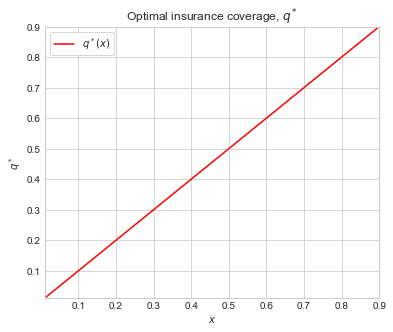

In [53]:
#iv 

fig = plt.figure(figsize=(6,5))

ax = fig.add_subplot(1,1,1)

ax.plot(x_values,q_star, color = 'red', label = '$q^*(x)$')

ax.set_title('Optimal insurance coverage, $q^*$')
ax.set_xlabel('$x$')
ax.set_xlim(xmin=0.01, xmax=0.9)
ax.set_ylabel('$q^*$')
ax.set_ylim(ymin=0.01, ymax=0.9)
ax.legend(loc='upper left',frameon=True)
ax.grid(True)

From this we can see, that the general solution to the agent’s problem is to set the insurance coverage equal to the monetary loss. Hence, the optimal contract for the agent covers all potential asset losses. This preference is also represented from the utility function, where $\vartheta = -2$. This implies that the agent is risk-averse, and therefore wishes full insurance coverance. 

# Question 2

We fix the loss at 0.6 and are now going to find the set of acceptable contracts from the agents point of view, where the expected value are the same regardless of having an insurance or not. The contract consist of coverage amount $q$, and insurance premium $\pi$. We solve this by finding the premium that equalizes being insured and not being insured, for a given set of coverage amounts.

In [54]:
# i
# we set x equal to 0.6
x = 0.6

# generate grid for q_values
N=100 #number of elements
q_min = 0.01 #minimum value
q_max = x #maximum value

q_values = np.linspace(q_min, q_max, N)

# generate grid to put the optimal pi's in
pis = np.zeros(N) 

# ii
# we first find the expected value for an uninsured person
V0 = uninsured_value(x, y, p)

# solving the values for pi, given the generated values of q
for i, q in enumerate(q_values):
    V = optimal_pi(q, x, y, p, V0)
    pis[i] = V.x

In the section below we plot the maximum acceptable premium for the agents, at any given coverage amount.

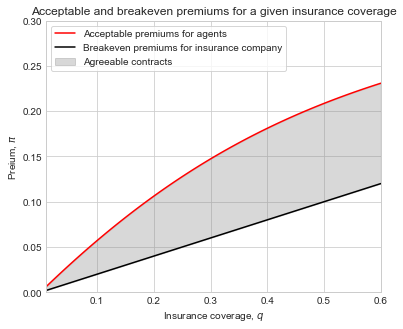

In [55]:
#iii

# generating the function pi, from the question before for each q representing the breakeven points for the insurance company
premiums = np.zeros(N)

for i, q in enumerate(q_values):
    premiums[i]=p*q

# plotting the figure
fig = plt.figure(figsize=(6, 5))

ax = fig.add_subplot(1,1,1)

ax.plot(q_values, pis, color = 'red', label = 'Acceptable premiums for agents')
ax.plot(q_values, premiums, color = 'black', label = 'Breakeven premiums for insurance company')
ax1=ax.fill_between(q_values, premiums, pis, alpha=.3, color = 'grey', label = 'Agreeable contracts')
ax.set_title('Acceptable and breakeven premiums for a given insurance coverage')
ax.set_xlabel('Insurance coverage, $q$')
ax.set_xlim(xmin=0.01, xmax=0.6)
ax.set_ylabel('Preium, $\pi$')
ax.set_ylim(ymin=0, ymax=0.3)
ax.legend(loc='upper left',frameon=True)
ax.grid(True)

The grey area represents the set of feasible contracts, in which the agent finds the contracts acceptable and the insurance company finds the contracts profitable.

# Question 3

The monetary loss is now drawn from a beta distribution and the insurance coverage is a fraction of this. We solve the model as in the question above, but are now using a monte carlo function to contruct the values of the monetary loss. We are given two different policies, where one has more coverage and higher premium than the other. We now want to investigate which policy that the agent prefers.

In [56]:
# setting parameters
N = 10000

# i 
# Monte carlo function is created and found i py file, the distribution parameters alpha and beta are also defined here. 

# ii
# first insurance policy: (gamma=0.9 and pi=0.2)
gamma1 = 0.9
pi1 = 0.2

value1 = monte_carlo(y, p, gamma1, pi1, N)
print(f'Expected utility of policy 1 is: {value1:.2f}')

# second insurane policy: (gamma=0.45 and pi=0.1)
gamma2 = 0.45
pi2 = 0.1

value2 = monte_carlo(y, p, gamma2, pi2, N)
print(f'Expected utility of policy 2 is: {value2:.2f}')

Expected utility of policy 1 is: -1.29
Expected utility of policy 2 is: -1.30


As the expected utility of policy 1 is a bit higher than the expected utility of policy 2, policy 1 is preferable to the agent. This means that the agent are willing to pay higher premiums for a higher coverage. This result is consistent with the findings of exercise 1, since the risk-averse utility function implies a preference for high insurance coverage, and hence willingness to pay for it. 

# Question 4

The insurance comapany seeks to maximize profits. In order to investigate which premium that maximizes profit at a given coverage ratio, we find the premium at which the agent is just indifferent between aquiring an insurance and not aquiring one, which corresponds to $U(uninsured) = U(insured)$ as the company is a monopolist.

In [57]:
# we first find the expected value for an uninsured person

#gamma = 0 #corresponds to no coverage
#pi = 0 # with no coverage there is no premium

U0 = monte_carlo(y, p, 0, 0, N)

gamma_a = 0.95

pi_optimal_c = float(optimal_pi_c(y, p, gamma_a, pi_guess_c, N, U0).x)

print(f'When the agent wants an insurance coverage ratio of {gamma_a:.2f}, they will be willing to pay a maximum of {pi_optimal_c:.2f} in premium.')

When the agent wants an insurance coverage ratio of 0.95, they will be willing to pay a maximum of 0.24 in premium.


In other words; when the agent requires an insurance coverage ratio of 0.95, the premium that maximizes the insurance companys profit is 0.24.